# Autoencoders for Dimensionality Reduction & Data Reconstruction

This notebook demonstrates the implementation of **Autoencoders**, an unsupervised deep learning technique used for:

- **Dimensionality reduction**
- **Feature learning**
- **Noise removal (denoising autoencoders)**
- **Data reconstruction**

It is part of my AI portfolio, showcasing skills in:
- Neural networks with TensorFlow/Keras  
- Latent space representations  
- Model training and evaluation  
- Visualization of learned encodings  


## What Is an Autoencoder?

An **autoencoder** is a neural network trained to compress input data into a **latent representation** (encoding) and then reconstruct the original data.

### Architecture Overview
- **Encoder:** Learns to compress input into a lower-dimensional latent vector  
- **Latent Space:** Compact representation capturing essential information  
- **Decoder:** Attempts to reconstruct the original data from the latent code  

Autoencoders are useful when you want the model to discover structure in data **without labels**.

---


## 🚀 Training Process Explained

This notebook walks through the following pipeline:

1. **Importing and preprocessing the dataset**  
2. **Building an encoder–decoder architecture**
3. **Training the autoencoder using reconstruction loss**
4. **Visualizing reconstruction quality**
5. **Inspecting the latent space**

Each section includes comments and code blocks designed to provide clarity and demonstrate best practices.

---


## Autoencoders. 
### Building a denoising autoencider using TensorFlow API. We remove successfully removed by passing several images of handwritten digits with added noise. Experimenting with several sizes of the middle (coding) layer: 128, 64, 32, 16.

In [1]:
import numpy as np
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Victor\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Importing the mnist data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
inputs_ = tf.placeholder(tf.float32,[None,28,28,1])
targets_ = tf.placeholder(tf.float32,[None,28,28,1])

In [4]:
def lrelu(x,alpha=0.1):
    return tf.maximum(alpha*x,x)

### Creating the layers for the coder and the decoder:

In [5]:
### Encoder
with tf.name_scope('en-convolutions'):
    conv1 = tf.layers.conv2d(inputs_,filters=32,kernel_size=(3,3),strides=(1,1),padding='SAME',use_bias=True,activation=lrelu,name='conv1')
with tf.name_scope('en-convolutions'):
    conv2 = tf.layers.conv2d(conv1,filters=16,kernel_size=(3,3),strides=(1,1),padding='SAME',use_bias=True,activation=lrelu,name='conv2')
with tf.name_scope('encoding'):
    encoded = tf.layers.max_pooling2d(conv2,pool_size=(2,2),strides=(2,2),name='encoding')
### Decoder
with tf.name_scope('decoder'):
    conv3 = tf.layers.conv2d(encoded,filters=32,kernel_size=(3,3),strides=(1,1),name='conv3',padding='SAME',use_bias=True,activation=lrelu)
    upsample2 = tf.layers.conv2d_transpose(conv3,filters=32,kernel_size=3,padding='same',strides=2,name='upsample2')
    logits = tf.layers.conv2d(upsample2,filters=1,kernel_size=(3,3),strides=(1,1),name='logits',padding='SAME',use_bias=True)
    decoded = tf.sigmoid(logits,name='recon')

In [7]:
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=targets_)
learning_rate=tf.placeholder(tf.float32)
cost = tf.reduce_mean(loss)  #cost
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost) #optimizer

## Training the network and showing the results:

Epoch: 1/25... Training loss: 0.5015 Validation loss: 0.5028
Epoch: 2/25... Training loss: 0.3749 Validation loss: 0.3757
Epoch: 3/25... Training loss: 0.1997 Validation loss: 0.2021
Epoch: 4/25... Training loss: 0.1587 Validation loss: 0.1580
Epoch: 5/25... Training loss: 0.1466 Validation loss: 0.1472
Epoch: 6/25... Training loss: 0.1286 Validation loss: 0.1303
Epoch: 7/25... Training loss: 0.1239 Validation loss: 0.1201
Epoch: 8/25... Training loss: 0.1192 Validation loss: 0.1201
Epoch: 9/25... Training loss: 0.1152 Validation loss: 0.1193
Epoch: 10/25... Training loss: 0.1224 Validation loss: 0.1199
Epoch: 11/25... Training loss: 0.1137 Validation loss: 0.1121
Epoch: 12/25... Training loss: 0.1106 Validation loss: 0.1118
Epoch: 13/25... Training loss: 0.1159 Validation loss: 0.1127
Epoch: 14/25... Training loss: 0.1094 Validation loss: 0.1084
Epoch: 15/25... Training loss: 0.1106 Validation loss: 0.1103
Epoch: 16/25... Training loss: 0.1099 Validation loss: 0.1106
Epoch: 17/25... T

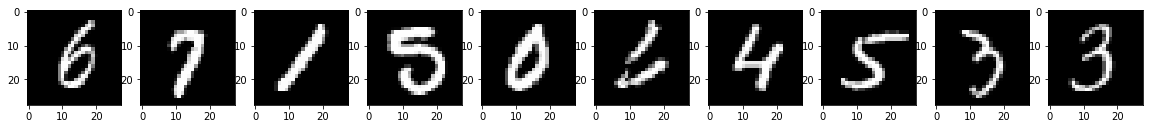

Noisy Images


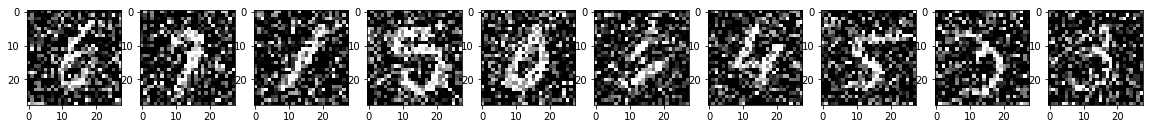

Reconstruction of Noisy Images


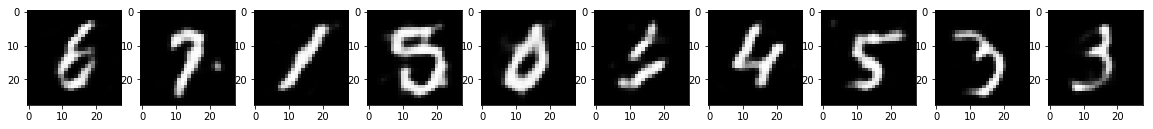

In [8]:
# Training

sess = tf.Session()
#tf.reset_default_graph()

saver = tf.train.Saver()
loss = []
valid_loss = []



display_step = 1
epochs = 25
batch_size = 64

lr=1e-5
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter('/users/Victor/documents/graphs/', sess.graph)
for e in range(epochs):
    total_batch = int(mnist.train.num_examples/batch_size)
    for ibatch in range(total_batch):
        batch_x = mnist.train.next_batch(batch_size)
        batch_test_x= mnist.test.next_batch(batch_size)
        imgs_test = batch_x[0].reshape((-1, 28, 28, 1))
        noise_factor = 0.5
        x_test_noisy = imgs_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs_test.shape) 
        x_test_noisy = np.clip(x_test_noisy, 0., 1.)
        imgs = batch_x[0].reshape((-1, 28, 28, 1))
        x_train_noisy = imgs + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs.shape) 
        x_train_noisy = np.clip(x_train_noisy, 0., 1.)
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: x_train_noisy,
                                                         targets_: imgs,learning_rate:lr})
      
        batch_cost_test = sess.run(cost, feed_dict={inputs_: x_test_noisy,
                                                         targets_: imgs_test})
    if (e+1) % display_step == 0:
        print("Epoch: {}/{}...".format(e+1, epochs),
                  "Training loss: {:.4f}".format(batch_cost),
                 "Validation loss: {:.4f}".format(batch_cost_test))
   
    loss.append(batch_cost)
    valid_loss.append(batch_cost_test)    
    saver.save(sess, '/users/Victor/documents/encode_model/') 

batch_x= mnist.test.next_batch(10)
imgs = batch_x[0].reshape((-1, 28, 28, 1))
noise_factor = 0.5
x_test_noisy = imgs + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs.shape) 
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
recon_img = sess.run([decoded], feed_dict={inputs_: x_test_noisy})[0]
plt.figure(figsize=(20, 4))
plt.title('Reconstructed Images')
print("Original Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(imgs[i, ..., 0], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Noisy Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i, ..., 0], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(recon_img[i, ..., 0], cmap='gray')    
plt.show()    

writer.close()

sess.close()


# Summary & Portfolio Notes

This autoencoder implementation highlights:

- Understanding of neural network architecture design  
- Application of unsupervised learning techniques  
- Ability to interpret and visualize latent space representations  
- Clean and maintainable code following PEP8  

This notebook is part of my **AI Engineering Portfolio**, showcasing practical experience with deep learning workflows.